/home/eric/.local/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


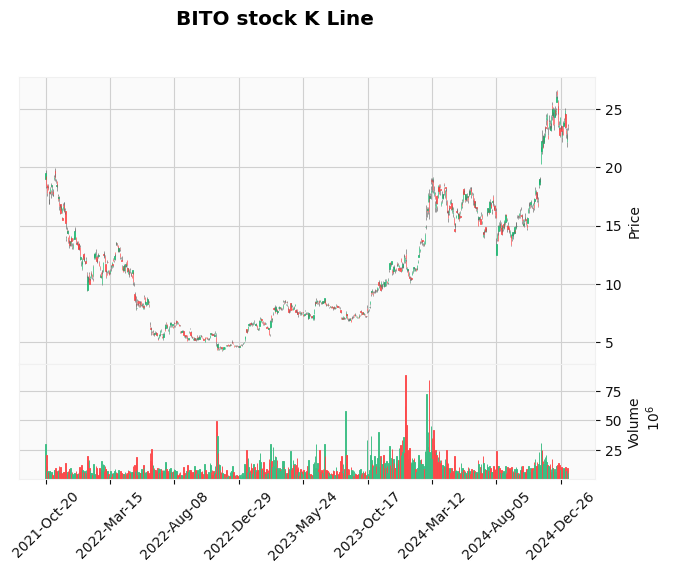

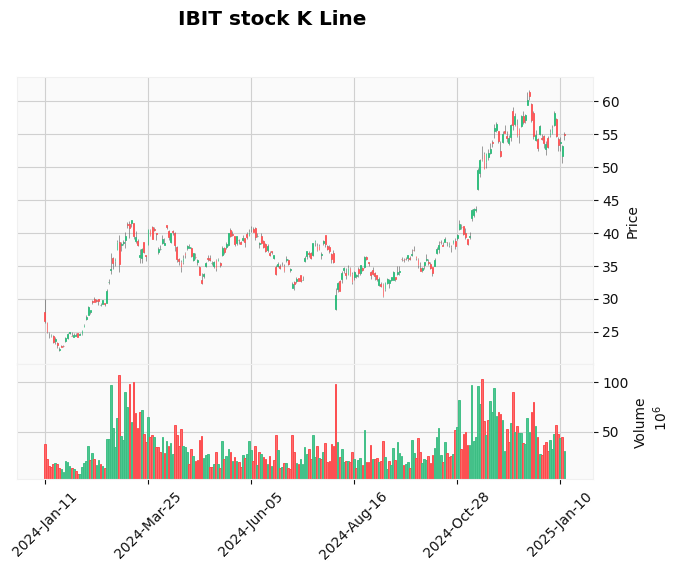

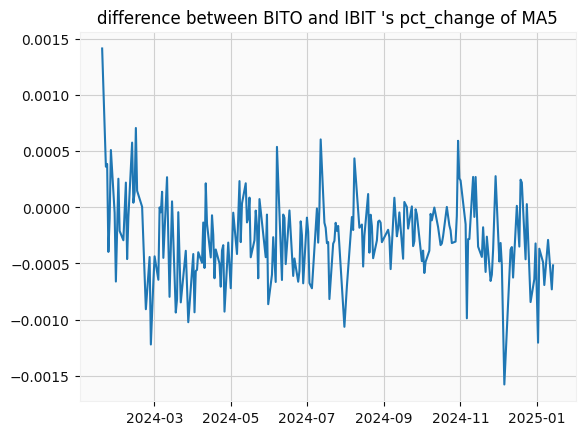

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.pyplot as plt

# 读取数据
data_BITO = pd.read_csv('/home/eric/Desktop/code/BTC_data_analyzation/datas/BITO_stock_data.csv')
data_IBIT = pd.read_csv('/home/eric/Desktop/code/BTC_data_analyzation/datas/IBIT_stock_data.csv')

data_BITO['Date'] = pd.to_datetime(data_BITO['Date'], utc=True)
data_IBIT['Date'] = pd.to_datetime(data_IBIT['Date'], utc=True)

data_BITO['Open'] = pd.to_numeric(data_BITO['Open'])
data_BITO['High'] = pd.to_numeric(data_BITO['High'])
data_BITO['Low'] = pd.to_numeric(data_BITO['Low'])
data_BITO['Close'] = pd.to_numeric(data_BITO['Close'])
data_BITO['Volume'] = pd.to_numeric(data_BITO['Volume'])
data_BITO.set_index('Date', inplace=True)

data_IBIT['Open'] = pd.to_numeric(data_IBIT['Open'])
data_IBIT['High'] = pd.to_numeric(data_IBIT['High'])
data_IBIT['Low'] = pd.to_numeric(data_IBIT['Low'])
data_IBIT['Close'] = pd.to_numeric(data_IBIT['Close'])
data_IBIT['Volume'] = pd.to_numeric(data_IBIT['Volume'])
data_IBIT.set_index('Date', inplace=True)

# 绘制K线图
mpf.plot(data_BITO, type='candle', title='BITO stock K Line', ylabel='Price', ylabel_lower='Volume', volume=True, style='yahoo')
mpf.plot(data_IBIT, type='candle', title='IBIT stock K Line', ylabel='Price', ylabel_lower='Volume', volume=True, style='yahoo')

data_IBIT['MA5'] = data_IBIT['Close'].rolling(window=5).mean().pct_change()
data_BITO['MA5'] = data_BITO['Close'].rolling(window=5).mean().pct_change()

df_diff=  data_BITO['MA5']-data_IBIT['MA5']
plt.plot(df_diff)

plt.title("difference between BITO and IBIT 's pct_change of MA5")
plt.show()